In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_dis_df = pd.read_csv('../impacts_research_data/ACSST1Y2023.S1810-2024-10-18T052457.csv')

In [3]:
for col_name in raw_dis_df.columns:
    raw_dis_df[col_name] = raw_dis_df[col_name].str.strip()

In [4]:
only_dis_df = raw_dis_df.iloc[22:, [0, 3, 4, 5, 6]].reset_index(drop=True)

### Cleaning

In [5]:
def clean_int(input_str):
    return int("".join(input_str.split(',')))

def clean_percent(input_str):
    return int("".join(input_str[0:-1].split('.')))/10.0

def clean_percent_moe(input_str):
    return int("".join(input_str[1:].split('.')))/10.0

def clean_moe(input_str):
    return clean_int(input_str[1:])

In [6]:
only_dis_df.head(5)

,Label (Grouping),"Imperial County, California!!With a disability!!Estimate","Imperial County, California!!With a disability!!Margin of Error","Imperial County, California!!Percent with a disability!!Estimate","Imperial County, California!!Percent with a disability!!Margin of Error"
0,With a hearing difficulty,"7,001","±1,251",4.0%,±0.7
1,Population under 18 years,497,±482,1.0%,±1.0
2,Population under 5 years,157,±216,1.3%,±1.8
3,Population 5 to 17 years,340,±348,0.9%,±0.9
4,Population 18 to 64 years,"1,711",±736,1.7%,±0.7


In [7]:
for col_name in only_dis_df.columns[1:]:
    if 'Percent' in col_name:
        if 'Estimate' in col_name:
            only_dis_df[col_name] = only_dis_df[col_name].apply(clean_percent)
        else: # percent moe
            only_dis_df[col_name] = only_dis_df[col_name].apply(clean_percent_moe)
    elif 'Estimate' in col_name: # int
        only_dis_df[col_name] = only_dis_df[col_name].apply(clean_int)
    else: # moe
        only_dis_df[col_name] = only_dis_df[col_name].apply(clean_moe)


In [9]:
cleaned_dis = only_dis_df.copy(deep=True)

In [10]:
# getting just the rows with the aggregate information
groups_dct = {}
for group in only_dis_df['Label (Grouping)']:
    if 'with' in group.lower() and 'difficulty' in group.lower():
        groups_dct[group] = only_dis_df[only_dis_df['Label (Grouping)'].eq(group)]

In [35]:
dis_num = {}
for row in list(groups_dct.keys()):
    type = " ".join(groups_dct[row].iloc[0, 0].split(" ")[2:][:-1])
    num_affected = groups_dct[row].iloc[0, 1]
    dis_num[type] = num_affected

In [36]:
plt.style.use('fivethirtyeight')

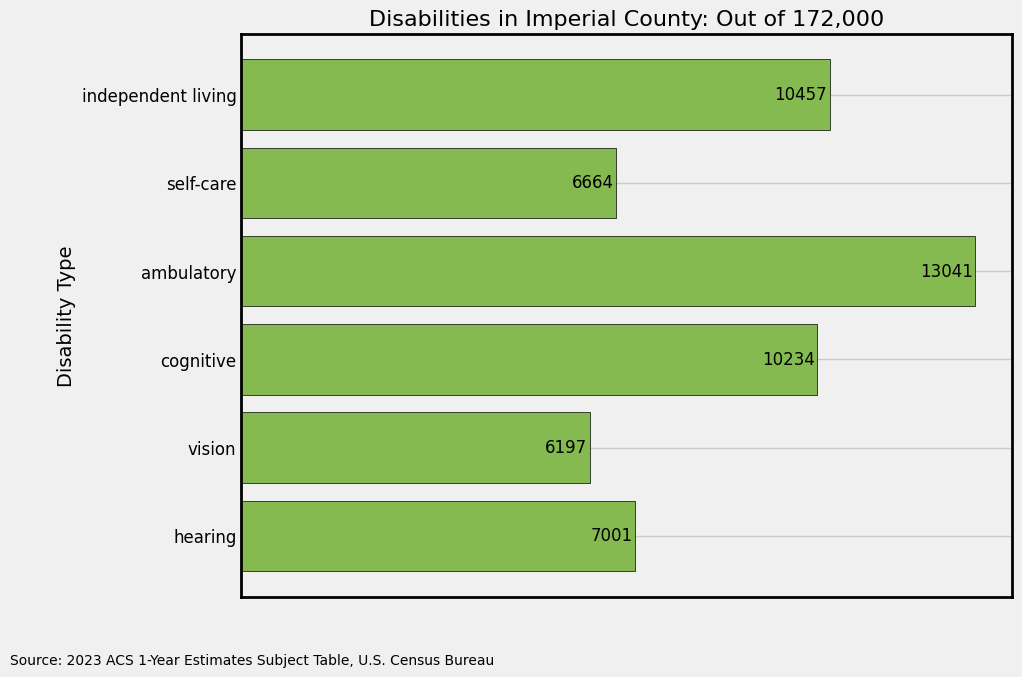

In [168]:
# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(11, 7))

disability_groups = list(dis_num.keys())
group_counts = [dis_num[type] for type in disability_groups]

bars = ax.barh(disability_groups, group_counts, color='#85ba50', edgecolor='black')

for bar in bars:
    width = bar.get_width()  
    ax.text(width - 50,  
            bar.get_y() + bar.get_height() / 2,  
            f'{int(width)}',  
            va='center',  
            ha='right',  
            fontsize=12, color='black')  

plt.title('Disabilities in Imperial County: Out of 172,000', fontsize=16)
plt.ylabel('Disability Type', fontsize=14)

ax.set_xticks([])
ax.tick_params(axis='y', labelsize=12)

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

plt.text(-0.3, -0.1, 'Source: 2023 ACS 1-Year Estimates Subject Table, U.S. Census Bureau', 
         transform=ax.transAxes, fontsize=10, va='top', ha='left')

plt.tight_layout()
plt.show()

In [81]:
# cleaning up the data for nicer processing

In [76]:
filtered_dis_df = cleaned_dis[~cleaned_dis['Label (Grouping)'].str.contains('under')]

In [78]:
filtered_dis_df = filtered_dis_df[~filtered_dis_df['Label (Grouping)'].str.contains('18 to 64')]

In [80]:
filtered_dis_df = filtered_dis_df[~filtered_dis_df['Label (Grouping)'].str.contains('65 years and over')]

In [83]:
filtered_dis_df = filtered_dis_df.reset_index(drop=True)

In [113]:
hearing_df = filtered_dis_df.iloc[0:6, :].reset_index(drop=True)
hearing_df.shape

(6, 5)

In [107]:
vision_df = filtered_dis_df.iloc[6:12, :].reset_index(drop=True)
vision_df.shape

(6, 5)

In [108]:
cognitive_df = filtered_dis_df.iloc[12:17, :].reset_index(drop=True)
cognitive_df.shape

(5, 5)

In [109]:
ambulatory_df = filtered_dis_df.iloc[17:22, :].reset_index(drop=True)
ambulatory_df.shape

(5, 5)

In [110]:
self_care_df = filtered_dis_df.iloc[22:27, :].reset_index(drop=True)
self_care_df.shape

(5, 5)

In [111]:
independent_df = filtered_dis_df.iloc[27:, :].reset_index(drop=True)
independent_df.shape

(5, 5)

In [118]:
list(independent_df['Label (Grouping)'][1:])

['Population 18 to 34 years',
 'Population 35 to 64 years',
 'Population 65 to 74 years',
 'Population 75 years and over']

In [122]:
values = list(hearing_df['Imperial County, California!!With a disability!!Estimate'])
values

[7001, 340, 74, 1637, 932, 3861]

In [162]:
def plot_age_6_5(name, df):
    new_labels = ['5-17', '18-34', '35-64', '65-74', '75+']
    values = list(df['Imperial County, California!!With a disability!!Estimate'])[1:]
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['gray', 'gray', '#85ba50', '#85ba50', '#85ba50']
    
    plt.bar(new_labels, values, color=colors)

    plt.title(f'{name} Distribution', fontsize=16)
    plt.xlabel('Age Range (Years)', fontsize=14)
    plt.ylabel('Number of People', fontsize=14)

    plt.xticks(rotation=45, ha='right')

    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

    plt.text(-0.1, -0.3, 'Source: 2023 ACS 1-Year Estimates Subject Table, U.S. Census Bureau', 
            transform=ax.transAxes, fontsize=10, va='top', ha='left')

    plt.tight_layout()
    plt.show()

In [163]:
def plot_age_5_5(name, df):
    new_labels = ['18-34', '35-64', '65-74', '75+']
    values = list(df['Imperial County, California!!With a disability!!Estimate'])[1:]
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['gray', '#85ba50', '#85ba50', '#85ba50']
    
    plt.bar(new_labels, values, color=colors)

    plt.title(f'{name} Distribution', fontsize=16)
    plt.xlabel('Age Range (Years)', fontsize=14)
    plt.ylabel('Number of People', fontsize=14)

    plt.xticks(rotation=45, ha='right')

    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

    plt.text(-0.1, -0.3, 'Source: 2023 ACS 1-Year Estimates Subject Table, U.S. Census Bureau', 
            transform=ax.transAxes, fontsize=10, va='top', ha='left')

    plt.tight_layout()
    plt.show()

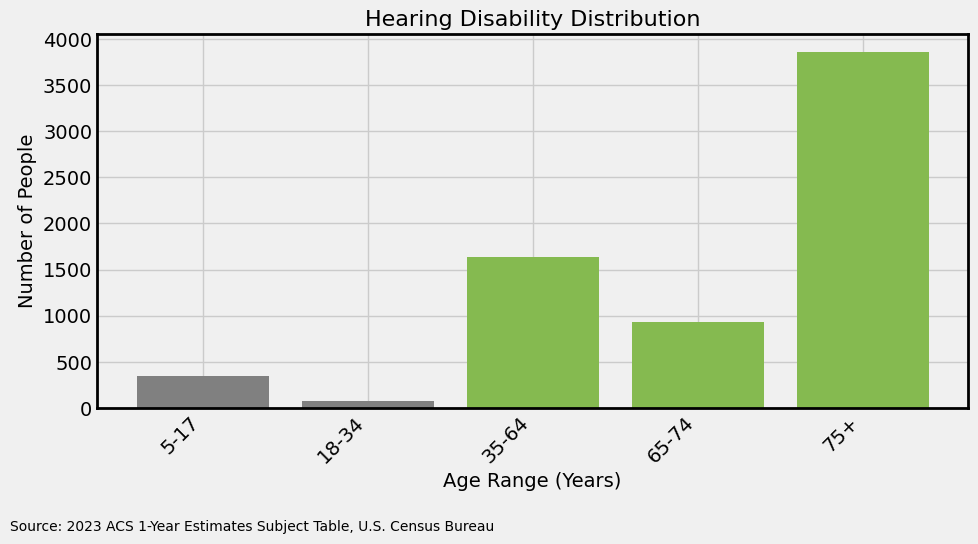

In [164]:
plot_age_6_5('Hearing Disability', hearing_df)

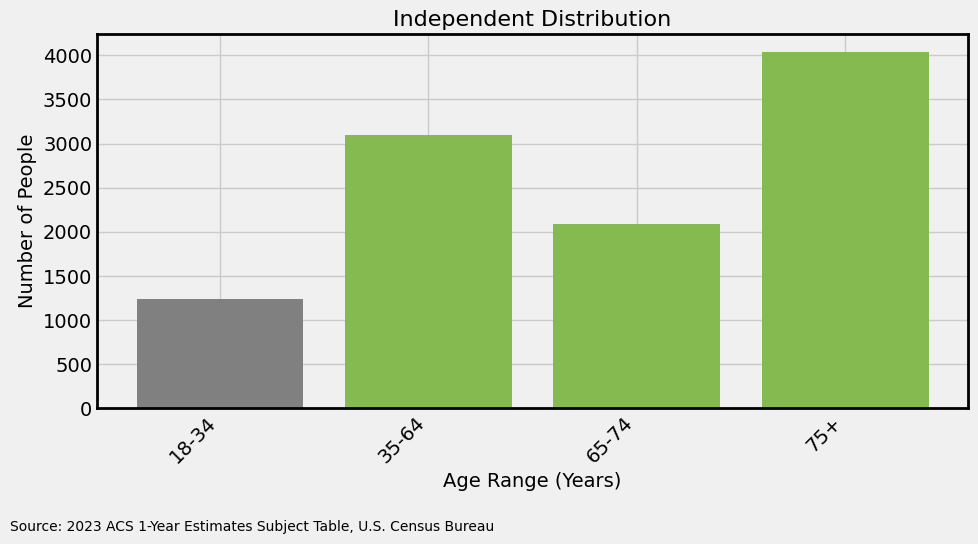

In [165]:
plot_age_5_5('Independent', independent_df)

In [166]:
types_of_df = [hearing_df, vision_df, cognitive_df, ambulatory_df, self_care_df, independent_df]
types_name = [
    'Hearing Disability', 
    'Vision Disability', 
    'Cognitive Disability', 
    'Ambulatory Disability', 
    'Self-Care Disability', 
    'Independent Living Disability'
    ]

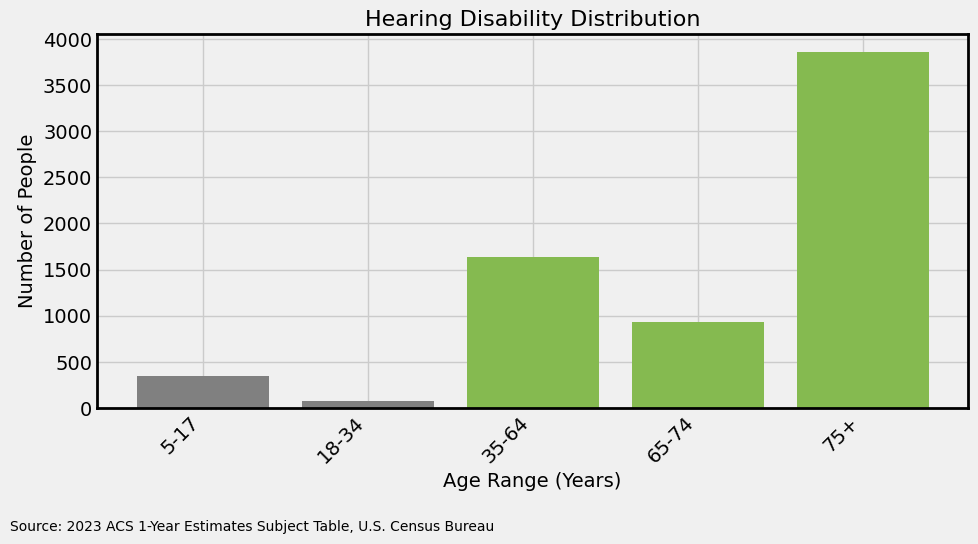

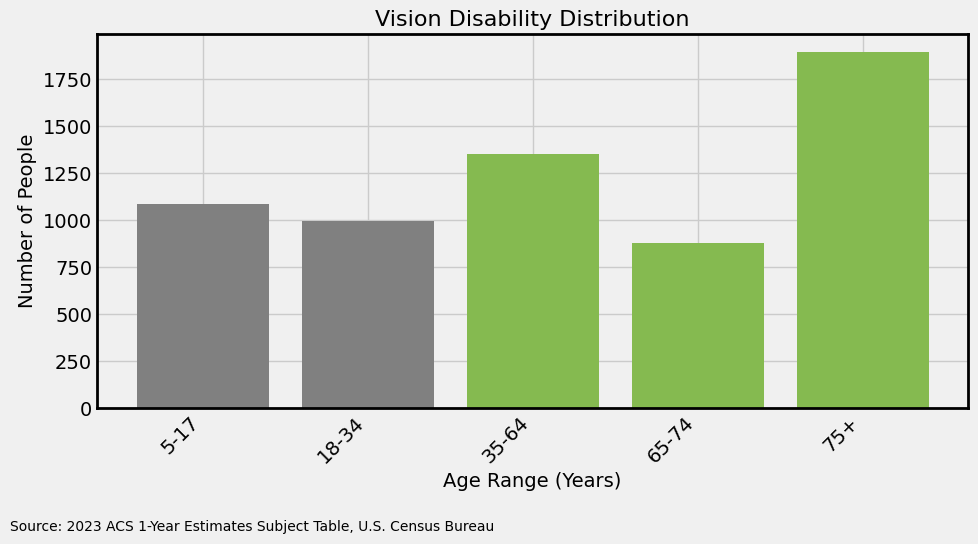

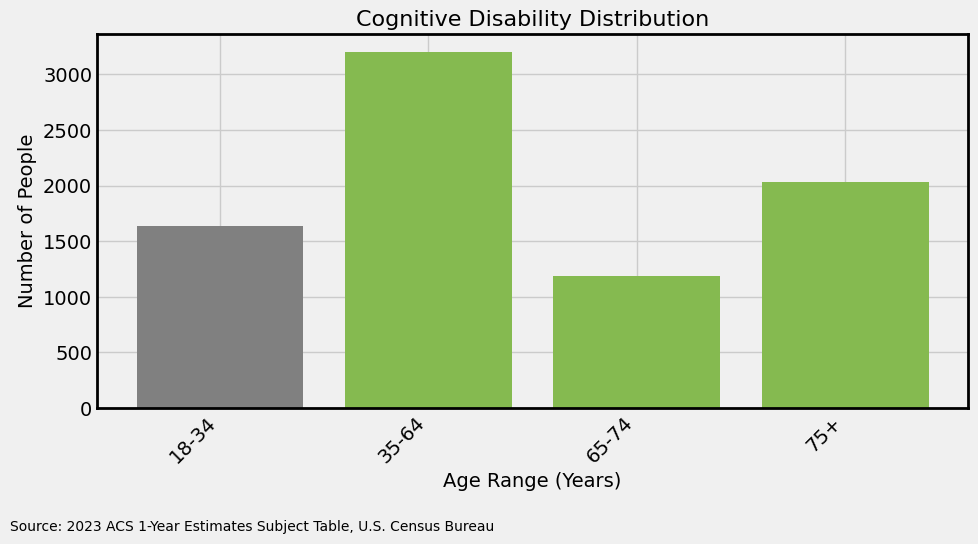

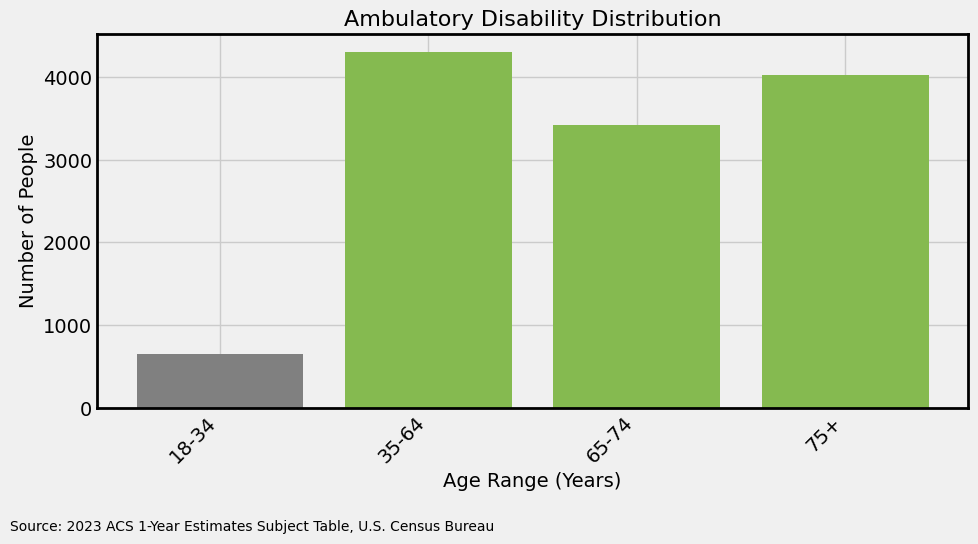

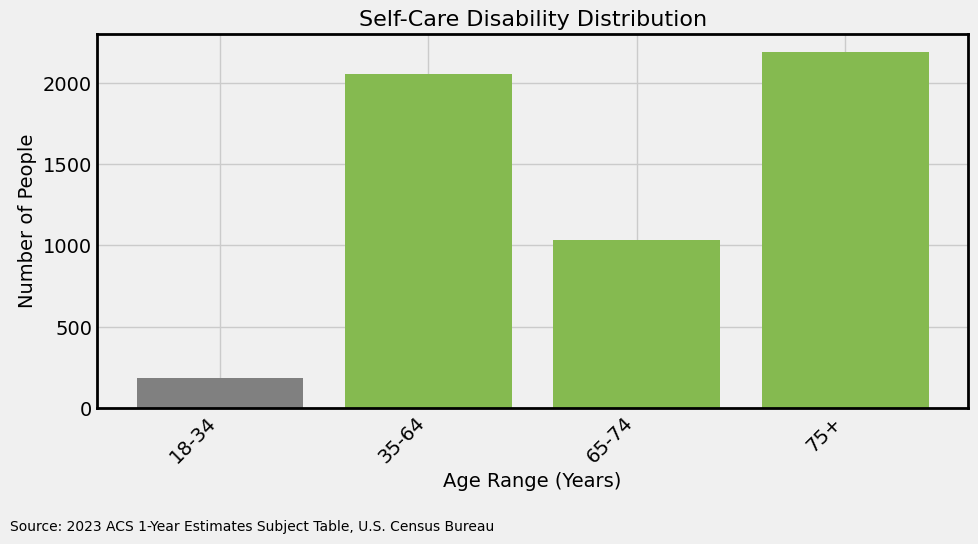

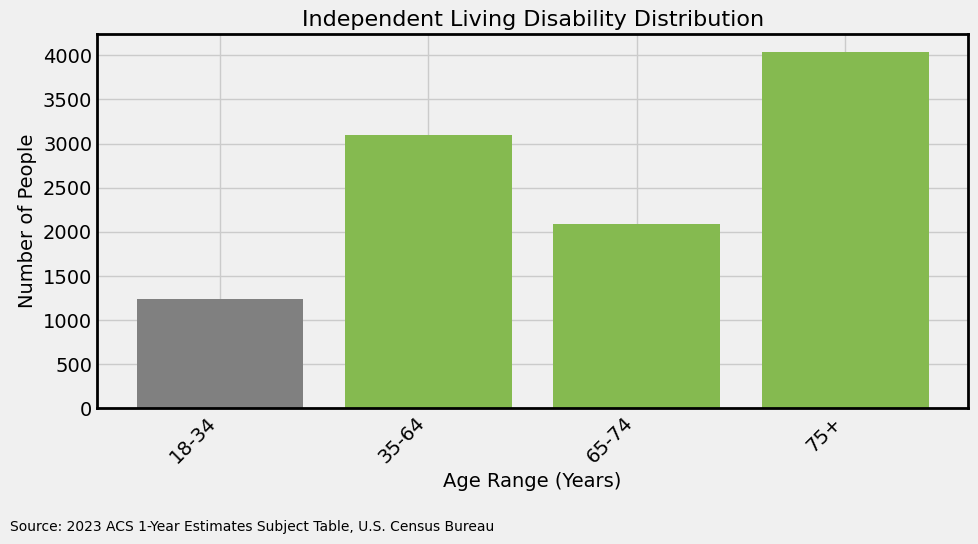

In [167]:
for ind, df in enumerate(types_of_df):
    if df.shape[0] == 6:
        plot_age_6_5(types_name[ind], df)
    else:
        plot_age_5_5(types_name[ind], df)